In [1]:
from import_setup import *
from wwtp import *
from electrolysis import *
from LS_elec import *
from gas_production import *
from el_grid import *
from methanation import *

In [2]:
filestr = "el_prices-and-gas_production.csv"
el_grid_germany = ElectricityGrid()
df = el_grid_germany.import_historic_prices(filestr)
# TODO: this function should become more interactive over time - see el_grid.py for further info
df["Real Price / EURO/MWh"] = el_grid_germany.calculate_real_price(df["Price / EURO/MWh"].values)

In [3]:
time_arr = df["Time / h"].values.astype(float)
time_diff = df["Time_diff / h"].values.astype(float)
raw_price = df["Price / EURO/MWh"].values.astype(float)
gas_production = df["Gas Production / Nm^3/h"].values.astype(float)
chp_is_run = np.zeros((time_arr.shape[0], num_chps))
maintenance_time = np.zeros((time_arr.shape[0], num_chps, num_maintenance_rules))
chp_run_time = np.ones((time_arr.shape[0], num_chps))
maintenance = np.zeros((time_arr.shape[0], num_chps))
gas_storage = np.zeros(time_arr.shape)
chp_load = np.zeros((time_arr.shape[0], num_chps))
chp_el_power = np.zeros((time_arr.shape[0], num_chps))
chp_th_power = np.zeros((time_arr.shape[0], num_chps))
chp_gas_consumption = np.zeros((time_arr.shape[0], num_chps))
flare_run_time = np.zeros(time_arr.shape[0])
flare_gas_consumption = np.zeros(time_arr.shape[0])
flare_gas_consumption = np.zeros(time_arr.shape[0])
temp_heat_net = np.zeros(time_arr.shape[0])
boiler_load = np.zeros((time_arr.shape[0], num_boilers))
boiler_th_power = np.zeros((time_arr.shape[0], num_boilers))
boiler_run_time = np.zeros((time_arr.shape[0], num_boilers))
boiler_gas_consumption = np.zeros((time_arr.shape[0], num_boilers))

In [4]:
operator = LoadScheduler(flare_threshold, chp_gas_storage_rules, chp_maintenance_rules, chps, boilers, heat_net, price_threshold=80)
gas_storage[0] = 2402.79 # Nm^3
temp_heat_net[0] = 70 # °C

In [5]:
statistics = np.zeros((len(time_arr), 9))

In [6]:
LOAD = 0
RUNTIME = 1
MAINTENANCE = 2
DEMAND = 3
SCHEDULE = slice(1, 4)      # Data Needed for Operator Schedule() Function
RUN = slice(0, 3)           # Data Needed for Electrolyzer Run() Function
O2 = 4
H2 = 5
HEAT = 6
PRODUCTION = slice(4, 7)    # Production Items
H2O = 7
PWR = 8
CONSUMPTION = slice(7, 9)   # Consumption Items
PROD_CONS = slice(4, 9)     # Production-Consumption

In [7]:
statistics[0, LOAD] = 1.0
statistics[0, DEMAND] = o2_sun['cons']

In [8]:
statistics[0]

array([  1.  ,   0.  ,   0.  , 297.04,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ])

In [9]:
for t in range(1, len(time_arr)):
    statistics[t, RUN] = operator.schedule_electrolyzer(*statistics[t-1, SCHEDULE], 0.25)
    statistics[t, RUNTIME:DEMAND], statistics[t, PROD_CONS] = electrolyzer.run(*statistics[t, RUN], 0.25)
    statistics[t, DEMAND] = np.maximum(statistics[t - 1, DEMAND] - statistics[t, O2], 0)
    statistics[t, DEMAND] += o2_sun['cons'] if t % 4 == 0 else 0

0.0 1000.0
0.25 1000.0
0.5 1000.0
0.75 1000.0
1.0 1000.0
1.25 1000.0
1.5 1000.0
1.75 1000.0
2.0 1000.0
2.25 1000.0
2.5 1000.0
2.75 1000.0
3.0 1000.0
3.25 1000.0
3.5 1000.0
3.75 1000.0
4.0 1000.0
4.25 1000.0
4.5 1000.0
4.75 1000.0
5.0 1000.0
5.25 1000.0
5.5 1000.0
5.75 1000.0
6.0 1000.0
6.25 1000.0
6.5 1000.0
6.75 1000.0
7.0 1000.0
7.25 1000.0
7.5 1000.0
7.75 1000.0
8.0 1000.0
8.25 1000.0
8.5 1000.0
8.75 1000.0
9.0 1000.0
9.25 1000.0
9.5 1000.0
9.75 1000.0
10.0 1000.0
10.25 1000.0
10.5 1000.0
10.75 1000.0
11.0 1000.0
11.25 1000.0
11.5 1000.0
11.75 1000.0
12.0 1000.0
12.25 1000.0
12.5 1000.0
12.75 1000.0
13.0 1000.0
13.25 1000.0
13.5 1000.0
13.75 1000.0
14.0 1000.0
14.25 1000.0
14.5 1000.0
14.75 1000.0
15.0 1000.0
15.25 1000.0
15.5 1000.0
15.75 1000.0
16.0 1000.0
16.25 1000.0
16.5 1000.0
16.75 1000.0
17.0 1000.0
17.25 1000.0
17.5 1000.0
17.75 1000.0
18.0 1000.0
18.25 1000.0
18.5 1000.0
18.75 1000.0
19.0 1000.0
19.25 1000.0
19.5 1000.0
19.75 1000.0
20.0 1000.0
20.25 1000.0
20.5 1000.0
20.

In [10]:
import seaborn as sns

In [11]:
statistics[:,2]

array([0., 0., 0., ..., 0., 0., 0.])

<AxesSubplot: >

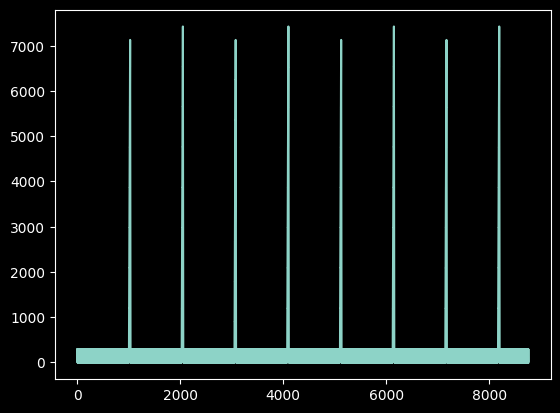

In [14]:
sns.lineplot(x=time_arr, y=statistics[:, DEMAND])